#**Senior Project**

#step1: Loading our dataset



#Loading data




#*   This dataset is the "Car_donation data" start around 1980 to 2023.....

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!pip freeze > requirements.txt

In [36]:
#Importing the require library
import os
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from scipy.stats import boxcox
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


In [37]:
# step 1: getting the datasets
#from google.colab import files
#uploaded=files.upload()

# then we are using pandas to read the csv
#import pandas as pd
car_donation=pd.read_csv('/content/drive/MyDrive/datas/_Car_Donation_Version7 - Raw Detail (1).csv')
# we are checking the head of the car donation, checking the first 10 rows
car_donation.head(10)

,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,name,car_year,...,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time
0,SF,1.0,11.0,2021.0,1.0,2021-01,2020/08/07,NaN,Chung Pei Chen,2011.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
1,SF,2.0,11.0,2020.0,11.0,2020-11,2020/10/31,4:00 PM,CHENH CARSON,2003.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
2,SF,3.0,11.0,2020.0,11.0,2020-11,2020/10/31,3:00 PM,Fuchun Wang,2001.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
3,SF,4.0,11.0,2020.0,11.0,2020-11,2020/11/01,11:30 PM,CHEN LEI,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
4,SF,5.0,11.0,2020.0,11.0,2020-11,2020/11/01,4:00 PM,MINGLANG HU,1999.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
5,SF,6.0,11.0,2020.0,11.0,2020-11,2020/11/01,1:30 PM,LI CHUAN,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
6,SF,7.0,11.0,2020.0,12.0,2020-12,2020/11/02,NaN,Shing Hing Inc,1998.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
7,SF,8.0,11.0,2020.0,11.0,2020-11,2020/11/03,11:00 PM,Fan Yong Fa,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
8,SF,9.0,11.0,2020.0,11.0,2020-11,2020/11/04,2~3pm,Sim Hubert Y,2004.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
9,SF,10.0,11.0,2020.0,11.0,2020-11,2020/11/03,1:30 PM,Hing Yungwi,2013.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56


Check Data at first sight

In [38]:
# then we wish to have a detail summary of the datasets
car_donation.describe()

,id,status,Sold_Year,Sold_month,car_year,cost,Direct cost,cost type,Cost subtype,complain,plateNew,categoryColor,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,dmvMarketValue,buyItNowPrice,specialPrice
count,1196.000000,1196.000000,1098.000000,1098.000000,1188.000000,121.000000,0.0,0.0,0.0,0.0,0.0,1196.000000,0.0,1196.000000,1196.0,0.0,4.00000,0.0,0.0
mean,541.401338,10.366221,2021.234062,6.310565,2001.547138,58.495868,NaN,NaN,NaN,NaN,NaN,0.047659,NaN,0.015886,0.0,NaN,2400.00000,NaN,NaN
std,329.939768,2.244024,0.604485,3.494637,5.052576,93.473002,NaN,NaN,NaN,NaN,NaN,0.368513,NaN,0.125088,0.0,NaN,864.09876,NaN,NaN
min,1.000000,1.000000,2018.000000,1.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1600.00000,NaN,NaN
25%,264.750000,11.000000,2021.000000,3.000000,1999.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1900.00000,NaN,NaN
50%,521.500000,11.000000,2021.000000,6.000000,2002.000000,35.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2200.00000,NaN,NaN
75%,824.250000,11.000000,2022.000000,9.000000,2005.000000,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2700.00000,NaN,NaN
max,1123.000000,12.000000,2022.000000,12.000000,2016.000000,710.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1.000000,0.0,NaN,3600.00000,NaN,NaN


In [39]:
# the columns's dtypes
car_donation.dtypes

operation             object
id                   float64
status               float64
Sold_Year            float64
Sold_month           float64
                      ...   
dmvMarketValue       float64
useTax                object
buyItNowPrice        float64
specialPrice         float64
data_refresh_time     object
Length: 72, dtype: object

In [40]:
car_donation['price']=car_donation['price'].str.replace(',','')
car_donation.price=car_donation.price.astype(float)
car_donation['mileage']=car_donation['mileage'].str.replace(',','')
car_donation['mileage'] = pd.to_numeric(car_donation['mileage'],errors='coerce')

# Main Focus:  Is there a chance that different people who repair the car tend to have a different price for selling that car?

In [41]:
car_donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   operation            1196 non-null   object 
 1   id                   1196 non-null   float64
 2   status               1196 non-null   float64
 3   Sold_Year            1098 non-null   float64
 4   Sold_month           1098 non-null   float64
 5   Sold_Yearmonth       1098 non-null   object 
 6   Donation_date        1191 non-null   object 
 7   time                 1093 non-null   object 
 8   name                 1170 non-null   object 
 9   car_year             1188 non-null   float64
 10  make                 1187 non-null   object 
 11  model                1173 non-null   object 
 12  mileage              1100 non-null   float64
 13  plate                1152 non-null   object 
 14  vin                  1169 non-null   object 
 15  phone                1184 non-null   o

# Fit an simple multilinear regression

In [42]:
!pip install statsmodels

In [43]:
from zmq.sugar.poll import select
# import the require library
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
# We are only select the relevant columns
columns_to_predict =['Sold_Year','Sold_month', 'car_year', 'mileage']
# We are Selecting the relevant columns
selected_columns = car_donation[columns_to_predict].fillna(0)
# We are Normalize the selected columns by using standard scaler
scaler = StandardScaler()
normalized_columns = scaler.fit_transform(selected_columns)
# Next, we are Creating a DataFrame with the normzlied values
normalized_df = pd.DataFrame(normalized_columns, columns = columns_to_predict)
# define the independent variable
#independent_variables = car_donation[columns_to_predict].fillna(0)
# define the dependent variable
dependent_variable = car_donation['price'].fillna(0)
# Next, we need to Add a constant term to the independent variables
independent_variables = sm.add_constant(normalized_df)
# We are ready to creat and fit the model
normalized_model = sm.OLS(dependent_variable, independent_variables)
results = normalized_model.fit()
# We are Printing the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     107.1
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           2.93e-81
Time:                        21:07:32   Log-Likelihood:                -14718.
No. Observations:                1672   AIC:                         2.945e+04
Df Residuals:                    1667   BIC:                         2.947e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1144.2697     39.430     29.021      0.0

# We are generate the residual plot

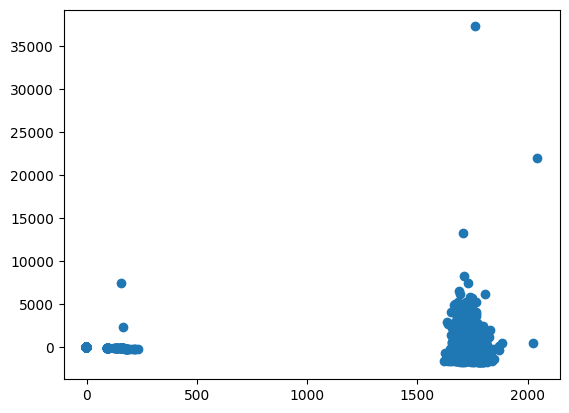

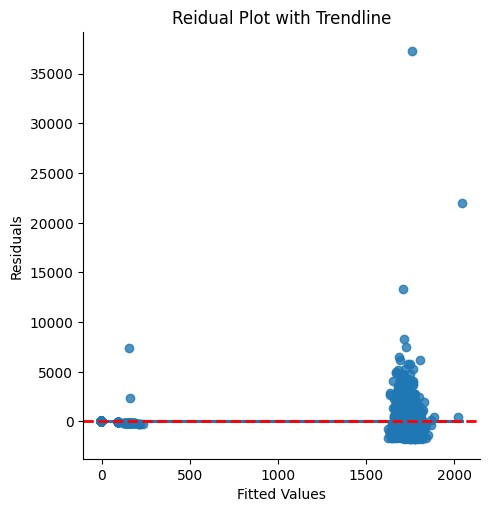

In [44]:
# We are Generate the residuals
residuals = results.resid
plt.scatter(results.fittedvalues, residuals)
# We need to add trendline using seaborn
plot_data = pd.DataFrame({'Fitted Values': results.fittedvalues, 'Residuals': residuals})

# need to reset the index to avoid the keyError
plot_data.reset_index(drop=True, inplace=True)
sns.lmplot(x='Fitted Values', y='Residuals', data=plot_data)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Reidual Plot with Trendline')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# generate the qqplot

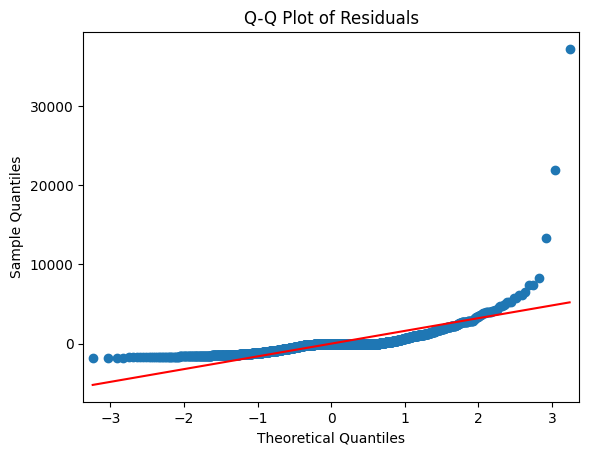

In [45]:
# import the require library
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Putting the test dataset

In [46]:
# step 1: getting the testing datasets


# then we are using pandas to read the csv
#import pandas as pd
testing_data=pd.read_csv('/content/drive/MyDrive/datas/testing dataset - Sheet1.csv')
# we are checking the head of the car donation, checking the first 10 rows
testing_data.head(10)

,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,name,car_year,...,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time
0,ETC,461,3,NaN,NaN,NaN,2021/7/2,"12:00-1:00pm, need jump up, NY NTD help to tak...",John Lui,2006.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10
1,ETC,462,11,2021.0,9.0,2021-9,2021/8/24,"car easy, SOH21-06-1",Wen Sici,2000.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10
2,ETC,463,11,2021.0,7.0,2021-07,2021/07/06,car easy SOH21-06-2,Kimhan Thung,1994.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10
3,ETC,464,11,2021.0,12.0,2021-12,2021/8/15,NaN,Cai Cheng,2001.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10
4,ETC,465,11,2022.0,5.0,2022-5,2021/08/05,"drive to SJ, can't find paper",Lam Chi H,1998.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10
5,ETC,466,10,NaN,NaN,NaN,2021/09/18,"overheat and blown head gasgate, gift to auto ...",Lew Melvin K,2001.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10
6,ETC,467,11,2022.0,4.0,2022-04,2022/04/29,韓先生 後面撞了 at body shop Release of Liability is ...,Da Q Han,2009.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10
7,ETC,468,11,2021.0,11.0,2021-11,2021/9/28,Car Easy SOH21-09-3,Quan Shuping,2003.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10
8,ETC,469,10,2021.0,10.0,2021-10,2021/09/23,12:00 by CarEasy SOH21-09-2,Shen Zie Chiang,1991.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10
9,ETC,470,11,2021.0,12.0,2021-12,2021/11/23,"Car Easy SOH21-10-2, ID:8686024",Liu Guihua,1994.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-26 14:22:10


In [47]:
testing_data['price'].dtypes

dtype('float64')

In [48]:
testing_data['mileage']=testing_data['mileage'].str.replace(',','')
testing_data['mileage'] = pd.to_numeric(testing_data['mileage'],errors='coerce')

# Next, we are ready to make the prediction

In [49]:
from zmq.sugar.poll import select
# import the require library
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
# We are only select the relevant columns
test_columns_to_predict =['Sold_Year','Sold_month', 'car_year', 'mileage']
# We are Selecting the relevant columns
test_selected_columns = testing_data[columns_to_predict].fillna(0)
normalized_test_columns = scaler.transform(test_selected_columns)
# We are Creating a DataFrame with the normalized values for the test dataset
normalized_test_df =pd.DataFrame(normalized_test_columns, columns=test_columns_to_predict)
# define the independent variable
#independent_variables = car_donation[columns_to_predict].fillna(0)
# define the dependent variable
# Next, we need to Add a constant term to the independent variables
independent_variables_test = sm.add_constant(normalized_df)
# We are Making predictions on the test dataset using the trained model
predictions = results.predict(independent_variables_test)

# We are Print or use the predictions as needed
print(predictions)


0       1672.886776
1       1749.318328
2       1758.971694
3       1796.284554
4       1800.709078
           ...     
1667      -3.227781
1668      -3.227781
1669      -3.227781
1670      -3.227781
1671      -3.227781
Length: 1672, dtype: float64


# We are getting the summary of the testing dataset fitting

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
# Print summary metrics
print("\nSummary of Predictions:")
print(f"Mean Squared Error: {mean_squared_error(dependent_variable, predictions)}")
print(f"R-squared: {r2_score(dependent_variable, predictions)}")


Summary of Predictions:
Mean Squared Error: 2591674.7739618537
R-squared: 0.2043921767738094


# We are doing residuals and QQ plot

In [51]:
residuals_test= dependent_variable - predictions

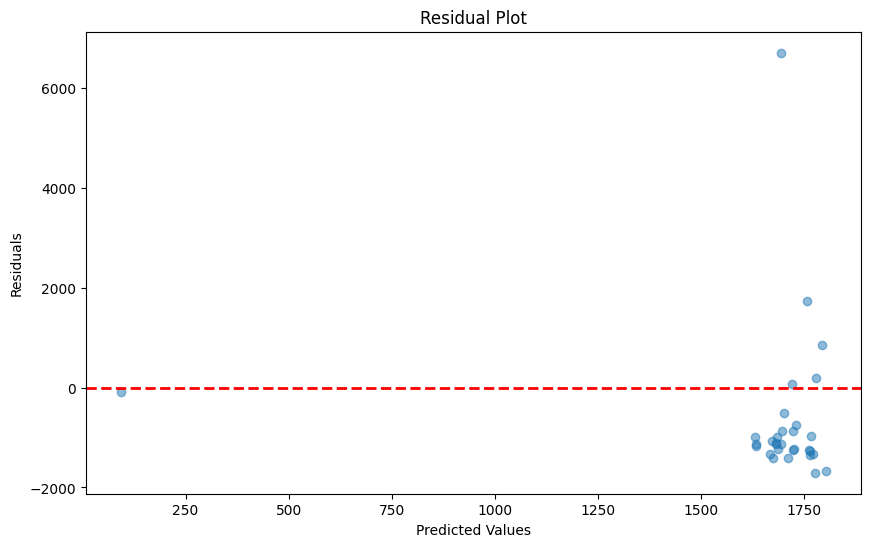

In [52]:
# import the require library
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# we are selecting relevant columns
selected_columns = testing_data[columns_to_predict].fillna(0)
# We Normalize the selected columns using the same scaler used for training
normalized_columns = scaler.transform(selected_columns)

# We are Creating a DataFrame with the normalized values for the test dataset
normalized_test_df = pd.DataFrame(normalized_columns, columns=columns_to_predict)
# We are Adding a constant term to the independent variables
independent_variables_test = sm.add_constant(normalized_test_df)
# We are Making predictions on the test dataset using the trained model
predictions = results.predict(independent_variables_test)
# We are Calculating the residuals
residuals = testing_data['price'] - predictions

# We are Generate a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--',linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


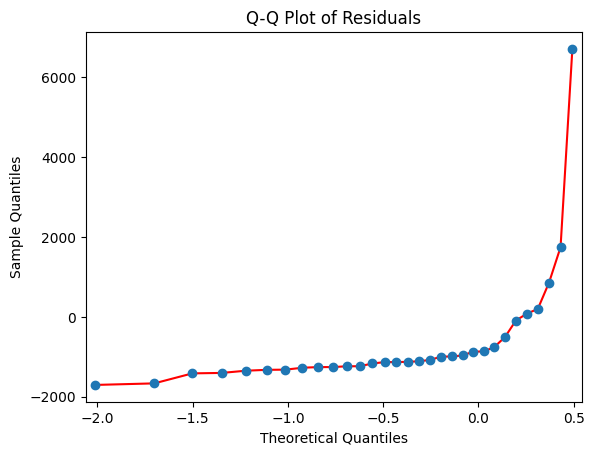

In [56]:

# import the require library
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s',color='red',linestyle='-')
plt.title('Q-Q Plot of Residuals')
plt.show()